In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm, skew, boxcox

In [2]:
df = pd.read_csv('cell_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019 entries, 0 to 2018
Columns: 119 entries, Unnamed: 0 to MorphologyV2Cell.YCentroid
dtypes: float64(49), int64(68), object(2)
memory usage: 1.8+ MB


In [3]:
angle_ch1 = df['MorphologyV2Cell.VarIntenCh3'][df['Case'] == 'Train']

In [4]:
angle_log = np.log(angle_ch1)
angle_sqrt = np.sqrt(angle_ch1)
angle_inv = 1 / angle_ch1

Skewness = 2.398751688087387


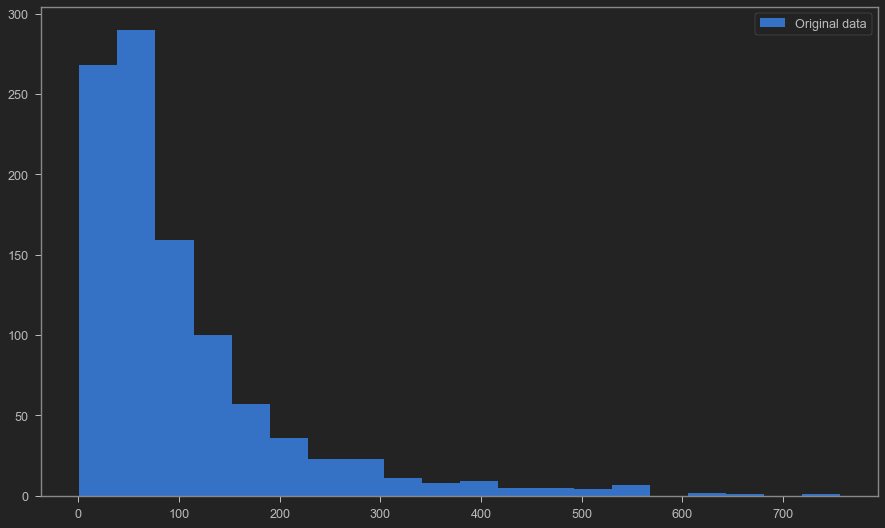

In [5]:
plt.hist(angle_ch1, label='Original data', bins=20)
plt.legend()
print(f'Skewness = {angle_ch1.skew()}')

Skewness = -0.4049897181476797


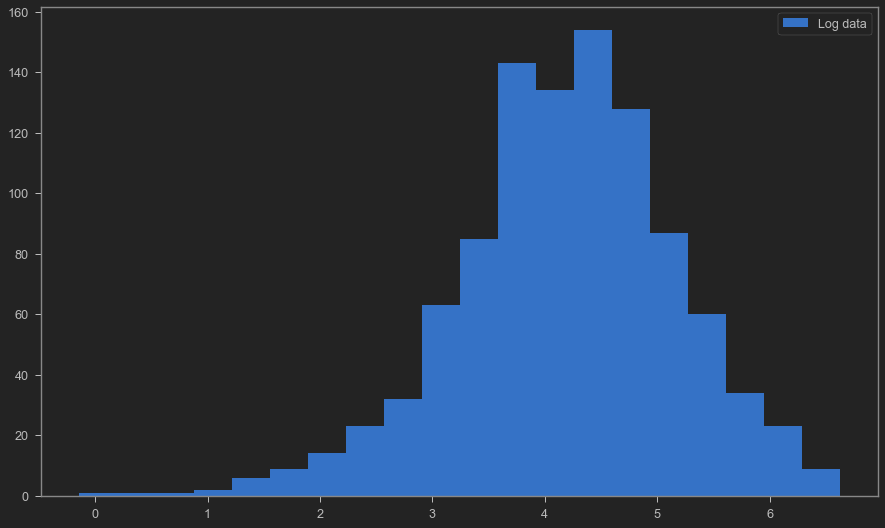

In [6]:
plt.hist(angle_log, label='Log data', bins=20)
plt.legend()
print(f'Skewness = {angle_log.skew()}')

Skewness = 11.588118455417865


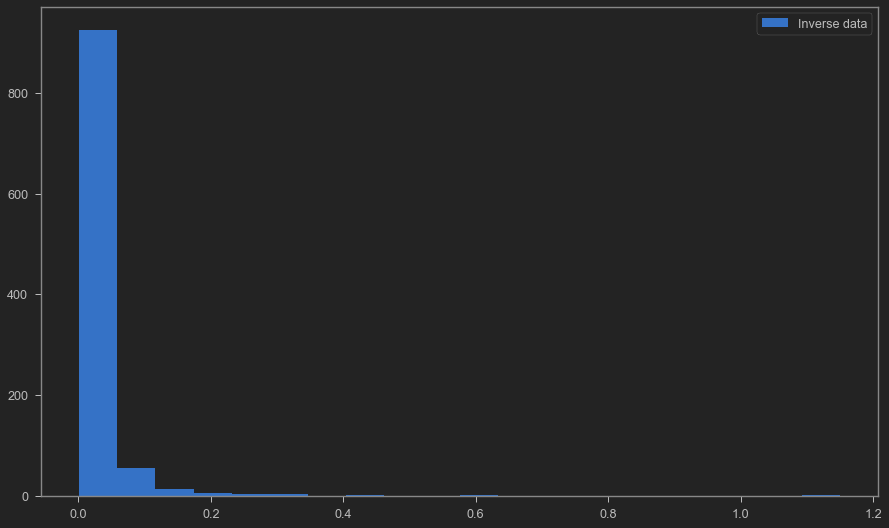

In [7]:
plt.hist(angle_inv, label='Inverse data', bins=20)
plt.legend()
print(f'Skewness = {angle_inv.skew()}')

Skewness = -0.7846595945094442


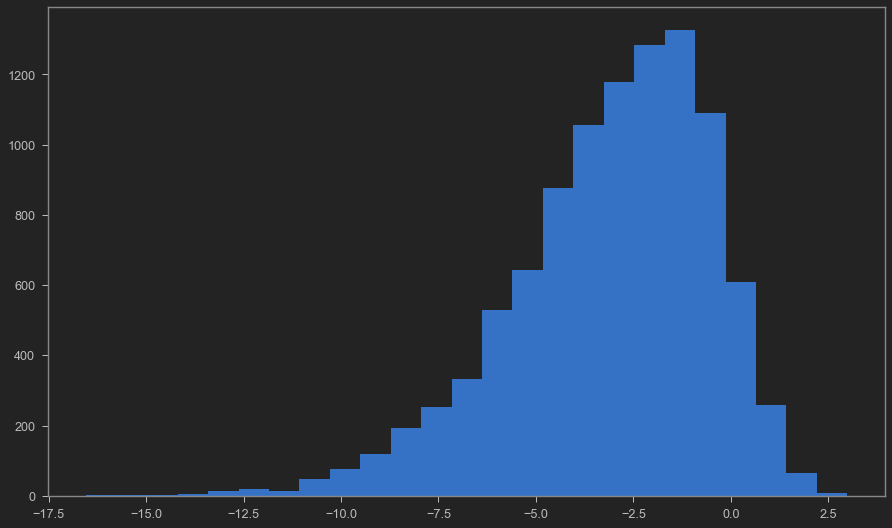

In [8]:
data_left_skew = skewnorm.rvs(a=-4, size=10000, scale=4)
plt.hist(data_left_skew, bins=25)
print('Skewness = {}'.format(skew(data_left_skew)))

Skewness = 50.291762876594326


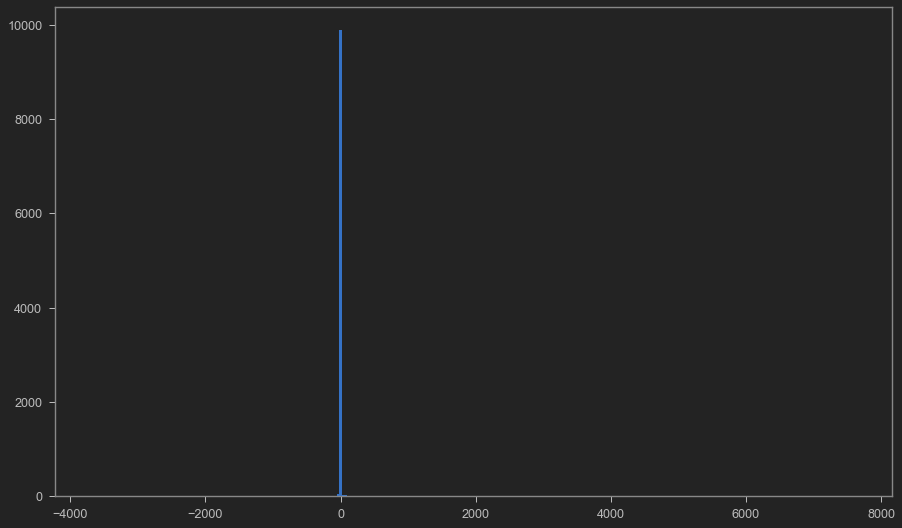

In [9]:
data_left_inv = 1 / data_left_skew
plt.hist(data_left_inv, bins=300)
print('Skewness = {}'.format(skew(data_left_inv)))

Maxlog = 0.1215319467853224


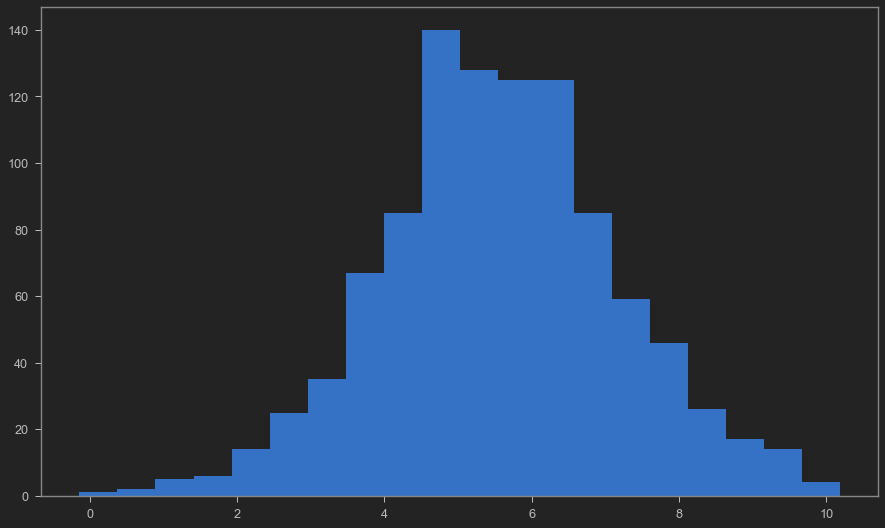

In [12]:
box_coxed, maxlog = boxcox(angle_ch1)
plt.hist(box_coxed, bins=20)
print(f'Maxlog = {maxlog}')

Maxlog = 0.1215319467853224
Min_ci = 0.05683170371472689, max_ci = 0.18739487865688392
Skewness boxcox = 0.00777349493624031, skewness log = -0.4043874033684697


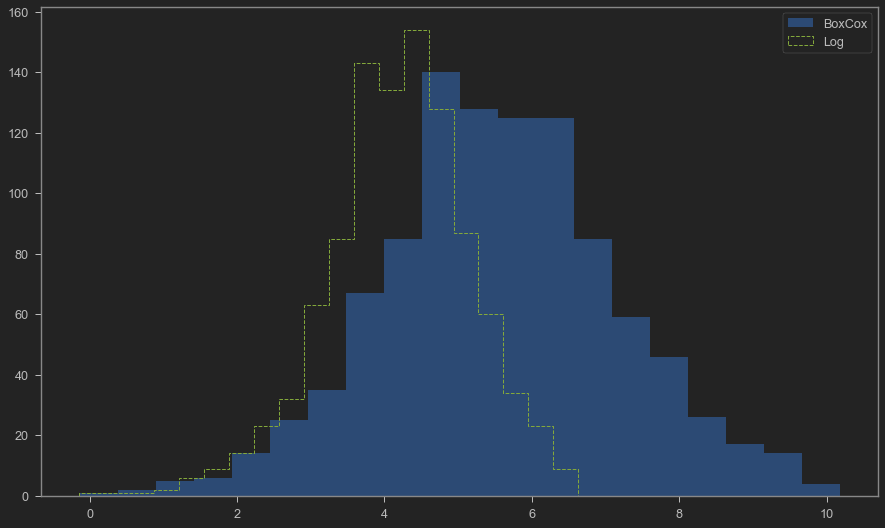

In [23]:
box_coxed, maxlog, (min_ci, max_ci) = boxcox(angle_ch1, alpha=0.01)
plt.hist(box_coxed, bins=20, alpha=0.5, label='BoxCox')
plt.hist(angle_log, bins=20, histtype='step', linestyle='--', label='Log', lw=1)
plt.legend()
print(f'Maxlog = {maxlog}')
print(f'Min_ci = {min_ci}, max_ci = {max_ci}')
print(f'Skewness boxcox = {skew(box_coxed)}, skewness log = {skew(angle_log)}')

In [24]:
box_coxed_manually = (angle_ch1 ** maxlog - 1) / maxlog
np.allclose(box_coxed, box_coxed_manually)

True